In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np

sns.set_theme()

In [3]:
import os

PLOT_DIR = "example-plots"

if not(os.path.exists(PLOT_DIR)):
    os.mkdir(PLOT_DIR)

In [4]:
THESIS_DIR = os.path.join(os.environ["HOME"], "Documents", "Studie", "Thesis", "Report", "thesis", "src")

if not(os.path.exists(THESIS_DIR)):
    raise Error("Set the correct thesis root dir to save results to!")

THESIS_FIGURE_DIR = os.path.join(THESIS_DIR, "fig", "eval")
THESIS_TABLE_DIR = os.path.join(THESIS_DIR, "tab", "eval")

os.makedirs(THESIS_FIGURE_DIR, exist_ok=True)
os.makedirs(THESIS_TABLE_DIR, exist_ok=True)

In [5]:
def optlevel_to_label(level: str):
    o = int(level)
    if o <= 2:
        return "off"
    elif o == 3:
        return "off+inlining"
    elif o == 4:
        return "on"
    elif o == 5:
        return "on+inlining"

In [172]:
import json

def read_json(path):
    data = list()
    columns = ["Benchmark", "Mode", "Threads", "Samples", "Score", "Score Error (99.9%)", "Unit", "Param: optimisationLevel", "Param: problemSize", "Param: sharedConstructors", "Param: switchImplementation"]
    
    with open(path, 'r') as f:
        for row in json.load(f):
            params = row["params"]
            for score in row["primaryMetric"]["rawData"][0]:
                x = [row["benchmark"], row["mode"], row["threads"], 1, score, "", row["primaryMetric"]["scoreUnit"], *params.values()]
                data.append(x)
    df = pd.DataFrame(data, columns=columns)
    df["Param: optimisationLevel"] = df["Param: optimisationLevel"].astype("int")
    df["Param: problemSize"] = df["Param: problemSize"].astype("int")
    return df

In [184]:
def read(f: str, **kwargs):
    if f.endswith(".csv"):
        return pd.read_csv(f"results/{f}", na_filter=False, **kwargs)
    elif f.endswith(".json"):
        return read_json(f"results/{f}", **kwargs)

# Load data
results_files = [
    "fibtest.json",
    # "20220113-094204 chocopy.csv",
    # "20220113-224422 -f 1.csv"
    # "20211229-180617 chocopy.csv"
    # "20211117-210600 chocopy.csv"
#     "20211014-124146 -p optimisationLevel=4 -f 2 -wi 2 -i 3 run.csv",
#     "20211013-114213_results-compilespace.csv"
#     "20211013-114213_results-compilespace.csv"
#     "20211013-124531-benchnullary.csv"
#     "20211012-102647.csv"
#     "20211007-135249.csv",
#     "20211007-084741.csv", # benchsym switch backend
#     "20211006-143434.csv", # more problem swtich backend
#     "20210915-111700.csv",
#     "results-compilespace.csv",
]

df_raw = pd.concat(map(read, results_files), ignore_index=True).rename(
    columns={"Param: optimisationLevel": "Pattern Match Compilation", "Param: problemSize": "Problem Size", "Param: sharedConstructors": "Shared Constructors", "Param: switchImplementation": "Codegen Implementation"}
)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Benchmark                  8 non-null      object 
 1   Mode                       8 non-null      object 
 2   Threads                    8 non-null      int64  
 3   Samples                    8 non-null      int64  
 4   Score                      8 non-null      float64
 5   Score Error (99.9%)        8 non-null      object 
 6   Unit                       8 non-null      object 
 7   Pattern Match Compilation  8 non-null      int64  
 8   Problem Size               8 non-null      int64  
 9   Shared Constructors        8 non-null      object 
 10  Codegen Implementation     8 non-null      object 
dtypes: float64(1), int64(4), object(6)
memory usage: 832.0+ bytes


In [185]:
# for col in ["Score", "Score Error (99.9%)"]:
#     if col in df_raw and df_raw[col].dtype == object:
#         df_raw[col] = df_raw[col].map(lambda s: s.replace(',', '.'), na_action="ignore").astype(float)
        
df_raw["Pattern Match Compilation"] = np.vectorize(optlevel_to_label)(df_raw["Pattern Match Compilation"])

df_raw

,Benchmark,Mode,Threads,Samples,Score,Score Error (99.9%),Unit,Pattern Match Compilation,Problem Size,Shared Constructors,Codegen Implementation
0,benchmark.stratego2.execution.Fibonacci.run,ss,1,1,1.988947,,s/op,off,18,on,
1,benchmark.stratego2.execution.Fibonacci.run,ss,1,1,2.062465,,s/op,off,18,on,
2,benchmark.stratego2.execution.Fibonacci.run,ss,1,1,4.040726,,s/op,off,19,on,
3,benchmark.stratego2.execution.Fibonacci.run,ss,1,1,3.978604,,s/op,off,19,on,
4,benchmark.stratego2.execution.Fibonacci.run,ss,1,1,8.835192,,s/op,off,20,on,
5,benchmark.stratego2.execution.Fibonacci.run,ss,1,1,8.839756,,s/op,off,20,on,
6,benchmark.stratego2.execution.Fibonacci.run,ss,1,1,22.798103,,s/op,off,21,on,
7,benchmark.stratego2.execution.Fibonacci.run,ss,1,1,22.706931,,s/op,off,21,on,


In [186]:
df_raw["Pattern Match Compilation"] = df_raw["Pattern Match Compilation"].astype("string")

In [187]:
df = df_raw[df_raw.Benchmark.str.endswith("jfr") == False].copy()
df

,Benchmark,Mode,Threads,Samples,Score,Score Error (99.9%),Unit,Pattern Match Compilation,Problem Size,Shared Constructors,Codegen Implementation
0,benchmark.stratego2.execution.Fibonacci.run,ss,1,1,1.988947,,s/op,off,18,on,
1,benchmark.stratego2.execution.Fibonacci.run,ss,1,1,2.062465,,s/op,off,18,on,
2,benchmark.stratego2.execution.Fibonacci.run,ss,1,1,4.040726,,s/op,off,19,on,
3,benchmark.stratego2.execution.Fibonacci.run,ss,1,1,3.978604,,s/op,off,19,on,
4,benchmark.stratego2.execution.Fibonacci.run,ss,1,1,8.835192,,s/op,off,20,on,
5,benchmark.stratego2.execution.Fibonacci.run,ss,1,1,8.839756,,s/op,off,20,on,
6,benchmark.stratego2.execution.Fibonacci.run,ss,1,1,22.798103,,s/op,off,21,on,
7,benchmark.stratego2.execution.Fibonacci.run,ss,1,1,22.706931,,s/op,off,21,on,


In [188]:
df["Stage"] = df["Benchmark"].str.rpartition('.')[2]
df["Problem"] = df["Benchmark"].str.split('.').map(lambda l: l[-2])
df

,Benchmark,Mode,Threads,Samples,Score,Score Error (99.9%),Unit,Pattern Match Compilation,Problem Size,Shared Constructors,Codegen Implementation,Stage,Problem
0,benchmark.stratego2.execution.Fibonacci.run,ss,1,1,1.988947,,s/op,off,18,on,,run,Fibonacci
1,benchmark.stratego2.execution.Fibonacci.run,ss,1,1,2.062465,,s/op,off,18,on,,run,Fibonacci
2,benchmark.stratego2.execution.Fibonacci.run,ss,1,1,4.040726,,s/op,off,19,on,,run,Fibonacci
3,benchmark.stratego2.execution.Fibonacci.run,ss,1,1,3.978604,,s/op,off,19,on,,run,Fibonacci
4,benchmark.stratego2.execution.Fibonacci.run,ss,1,1,8.835192,,s/op,off,20,on,,run,Fibonacci
5,benchmark.stratego2.execution.Fibonacci.run,ss,1,1,8.839756,,s/op,off,20,on,,run,Fibonacci
6,benchmark.stratego2.execution.Fibonacci.run,ss,1,1,22.798103,,s/op,off,21,on,,run,Fibonacci
7,benchmark.stratego2.execution.Fibonacci.run,ss,1,1,22.706931,,s/op,off,21,on,,run,Fibonacci


In [189]:
import re
import os

# Add number of unique constructors to problems
# cons_regex_pat = r"\bconstructors\b\W*(?:\s*(\w*)\s*:.*\s*)*\W*\brules\b"

cons_area_regex = r"^\s*constructors\s*$((?:.*\n)*)^\s*rules\s*$"
cons_area_pat = re.compile(cons_area_regex, re.MULTILINE)

cons_regex = r"\w+\s*:.*\S"
cons_pat = re.compile(cons_regex)

def find_constructors(p):
    cons_areas = cons_area_pat.findall(p)
    cons_groups = list(map(cons_pat.findall, cons_areas))
    conses = set().union(*cons_groups)
    return conses

def count_constructors_in_file(program_name):
    p_program = os.path.join("..", "src", "main", "resources", program_name + ".str2")
    try:
        with open(p_program, 'r') as f_program:
            contents = f_program.read()
            conses = find_constructors(contents)
            return len(conses)
    except:
        return np.nan

df["Number of constructors"] = (df["Problem"].str.lower() + df["Problem Size"].astype("str").mask(df["Problem Size"]==-1, "")).map(count_constructors_in_file)

In [190]:
## Plot-specific settings
configs = [
    {
        "problems": {"Benchexpr", "Benchsym", "Benchtree", "Bubblesort", "Factorial", "Fibonacci", "Hanoi", "Mergesort", "Quicksort", "Sieve"},
        "stages": {"run"},
        "settings": {"yscale": "log"}
    },
    {
        # Apply to all problems
        "stages": {"compileStratego", "compileJava", "Java space", "Class space"},
        "settings": {"ylim": (0, None)}
    },
    {
        "stages": {"Java space", "Class space"},
        "settings": {"ylabel": "Size (bytes)"}
    }
]

In [191]:
from pandas.core.common import flatten

def configure_grid(g: sns.FacetGrid, problem=None):
    ## Global settings
    g.set_ylabels("Time (s)")
    g.set_xlabels("Input size")

    for ax in flatten(g.axes):
        ax.get_xaxis().set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))

    # Specific settings
    try:
        for (row_val, col_val), ax in g.axes_dict.items():
            for config in configs:
                if "problems" not in config or row_val in config["problems"]:
                    if "stages" not in config or col_val in config["stages"]:
                        ax.set(**config["settings"])
    except (ValueError):
        for col_val, ax in g.axes_dict.items():
            for config in configs:
                if "problems" not in config or problem in config["problems"]:
                    if "stages" not in config or col_val in config["stages"]:
                        ax.set(**config["settings"])
    finally:
        return g

In [192]:
df_scaledproblem = df[(df["Problem Size"] != -1) & (df["Problem"] != "BenchNullary")]

In [193]:
df_scaledproblem[(df_scaledproblem["Problem"] == "Fibonacci") & (df_scaledproblem["Stage"] == "run")]

,Benchmark,Mode,Threads,Samples,Score,Score Error (99.9%),Unit,Pattern Match Compilation,Problem Size,Shared Constructors,Codegen Implementation,Stage,Problem,Number of constructors
0,benchmark.stratego2.execution.Fibonacci.run,ss,1,1,1.988947,,s/op,off,18,on,,run,Fibonacci,NaN
1,benchmark.stratego2.execution.Fibonacci.run,ss,1,1,2.062465,,s/op,off,18,on,,run,Fibonacci,NaN
2,benchmark.stratego2.execution.Fibonacci.run,ss,1,1,4.040726,,s/op,off,19,on,,run,Fibonacci,NaN
3,benchmark.stratego2.execution.Fibonacci.run,ss,1,1,3.978604,,s/op,off,19,on,,run,Fibonacci,NaN
4,benchmark.stratego2.execution.Fibonacci.run,ss,1,1,8.835192,,s/op,off,20,on,,run,Fibonacci,NaN
5,benchmark.stratego2.execution.Fibonacci.run,ss,1,1,8.839756,,s/op,off,20,on,,run,Fibonacci,NaN
6,benchmark.stratego2.execution.Fibonacci.run,ss,1,1,22.798103,,s/op,off,21,on,,run,Fibonacci,NaN
7,benchmark.stratego2.execution.Fibonacci.run,ss,1,1,22.706931,,s/op,off,21,on,,run,Fibonacci,NaN


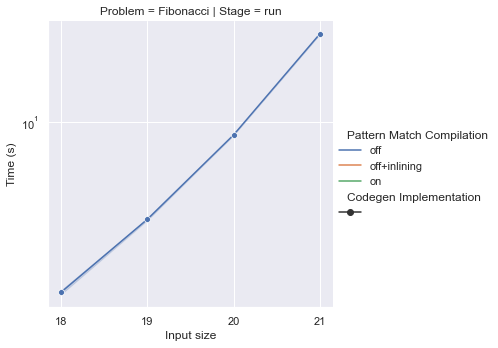

In [194]:
g = configure_grid(sns.relplot(
    data=df_scaledproblem,
    x="Problem Size",
    y="Score",
    row="Problem",
    row_order=np.sort(np.unique(df_scaledproblem["Problem"].values)),
    col="Stage",
    col_order=[s for s in ["compileStratego", "Java space", "compileJava", "Class space", "run"] if s in df_scaledproblem["Stage"].values],
    style="Codegen Implementation",
    hue="Pattern Match Compilation",
    hue_order=map(optlevel_to_label, ["2", "3", "4"]),
    kind="line",
#     err_style="band",
    markers=True,
    facet_kws=dict(
        sharex=False, 
        sharey=False,
    ),
))

# TODO Include strj runtime -> with and without fusion

# Save figure to file
g.savefig(f"{PLOT_DIR}/{'_'.join(results_files)}-allstages.png")
# g.savefig(f"{THESIS_FIGURE_DIR}/rec-allstages.pdf")

In [195]:
# g = configure_grid(sns.relplot(
#     data=df_scaledproblem,
#     x="Problem Size",
#     y="Score",
#     row="Problem",
#     row_order=np.sort(np.unique(df_scaledproblem["Problem"].values)),
#     col="Stage",
#     col_order=[s for s in ["compileStratego", "Java space", "compileJava", "Class space", "run"] if s in df_scaledproblem["Stage"].values],
#     style="Codegen Implementation",
#     hue="Pattern Match Compilation",
#     hue_order=map(optlevel_to_label, ["2", "3", "4"]),
#     kind="line",
# #     err_style="band",
#     markers=True,
#     facet_kws=dict(
#         sharex=False, 
#         sharey=False,
#     ),
# ))

# # TODO Include strj runtime -> with and without fusion

# # Save figure to file
# plt.savefig(f"{PLOT_DIR}/{'_'.join(results_files)}-allstages.png")

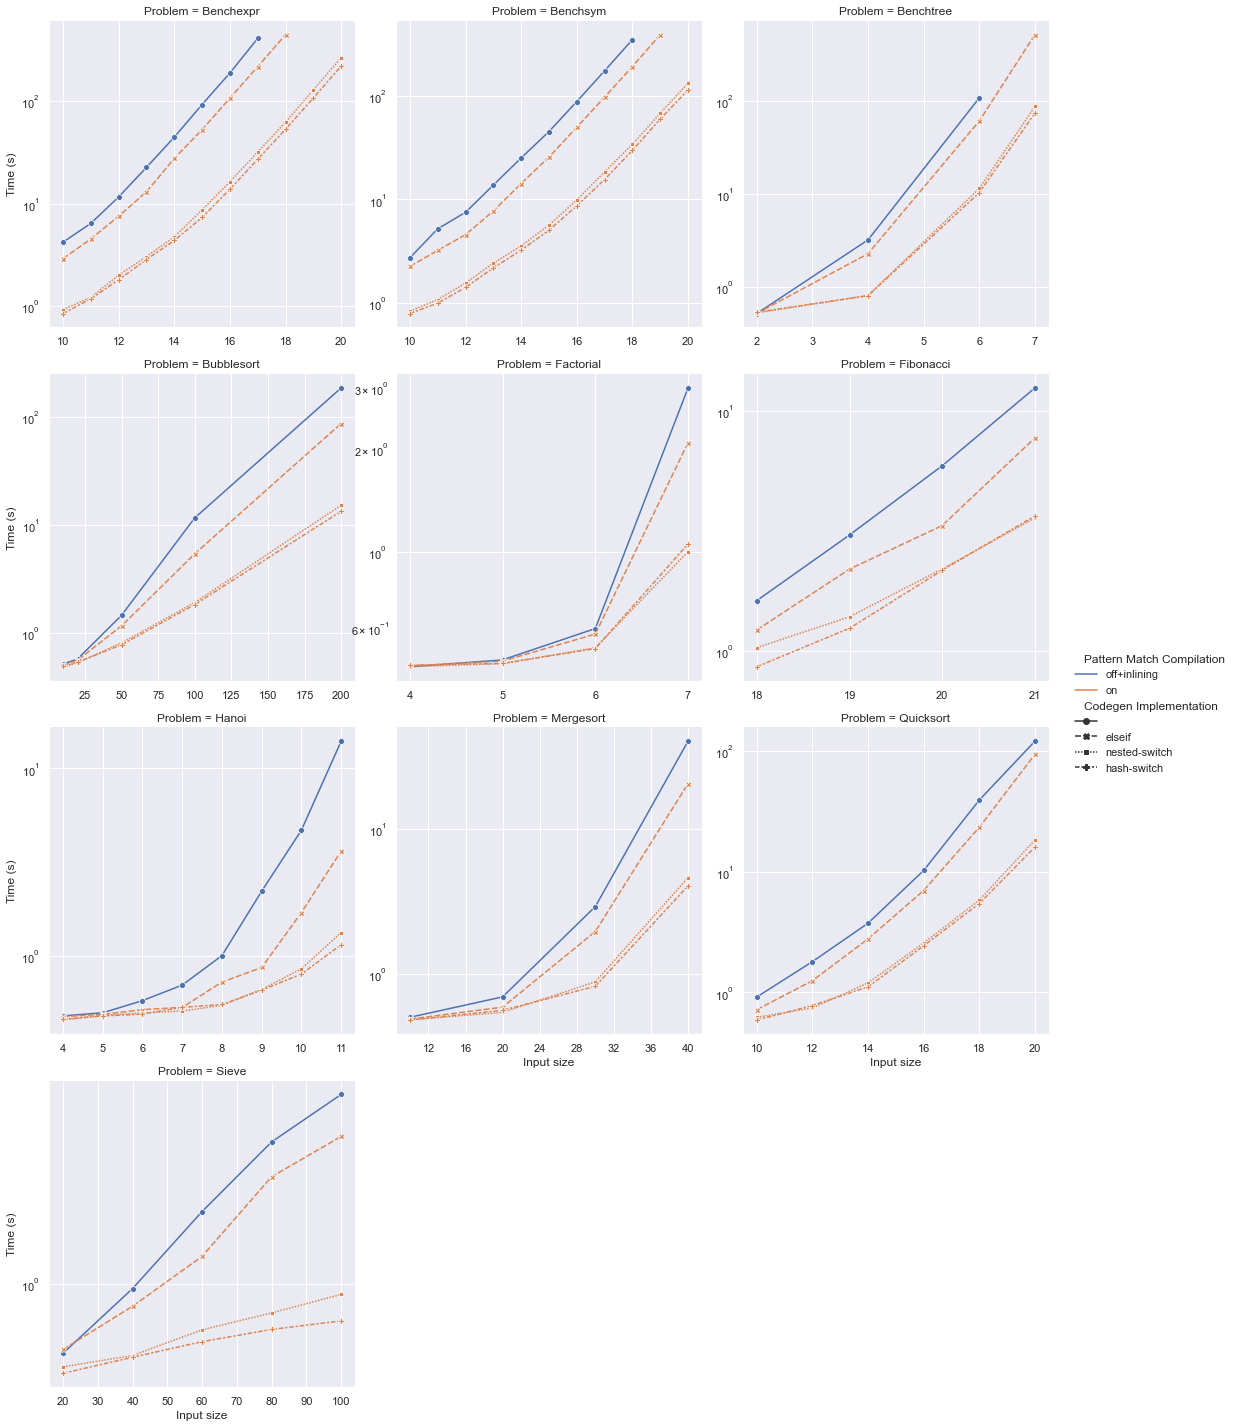

In [18]:
# Runtimes for DFA switch backends (per problem)

cols = np.sort(np.unique(df_scaledproblem["Problem"].values))
opt_levels = list(map(optlevel_to_label, ["3", "4"]))

g = configure_grid(sns.relplot(
    data=df_scaledproblem[(df_scaledproblem["Stage"] == "run") & (df_scaledproblem["Pattern Match Compilation"].isin(opt_levels))],
    x="Problem Size",
    y="Score",
    col="Problem",
    col_order=cols,
    col_wrap=min(3, len(cols)),
#     style="Codegen Implementation",
    # hue="Codegen Implementation",
    style="Codegen Implementation",
    hue="Pattern Match Compilation",
    hue_order=opt_levels,
    kind="line",
#     err_style="band",
    markers=True,
    facet_kws=dict(
        sharex=False, 
        sharey=False,
    ),
))

g.set(yscale="log")

# TODO Include strj runtime -> with and without fusion

# Save figure to file
g.savefig(f"{PLOT_DIR}/{'_'.join(results_files)}-runtime.png")

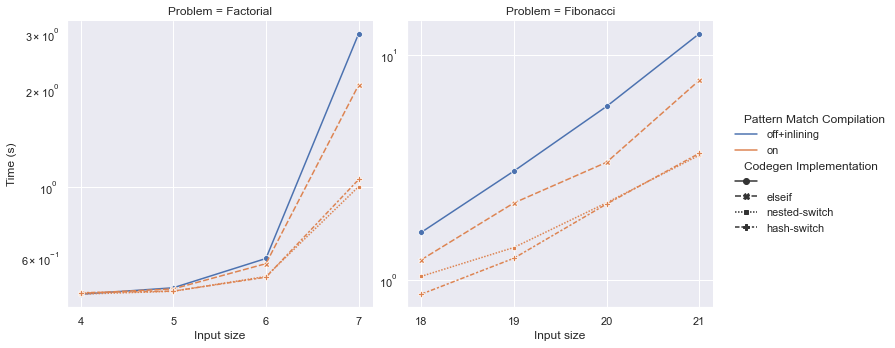

In [19]:
# Runtimes for DFA switch backends (per problem)

cols = ["Factorial", "Fibonacci"]
opt_levels=list(map(optlevel_to_label, ["3", "4"]))

g = configure_grid(sns.relplot(
    data=df_scaledproblem[(df_scaledproblem["Stage"] == "run") & (df_scaledproblem["Pattern Match Compilation"].isin(opt_levels))],
    x="Problem Size",
    y="Score",
    col="Problem",
    col_order=cols,
    col_wrap=min(3, len(cols)),
    style="Codegen Implementation",
    hue="Pattern Match Compilation",
    hue_order=opt_levels,
    kind="line",
#     err_style="band",
    markers=True,
    facet_kws=dict(
        sharex=False, 
        sharey=False,
    ),
))

g.set(yscale="log")

# TODO Include strj runtime -> with and without fusion

# Save figure to file
g.savefig(f"{PLOT_DIR}/{'_'.join(results_files)}-fact&fib-run.png")
# g.savefig(f"{THESIS_FIGURE_DIR}/rec-fact&fib-run.pdf")

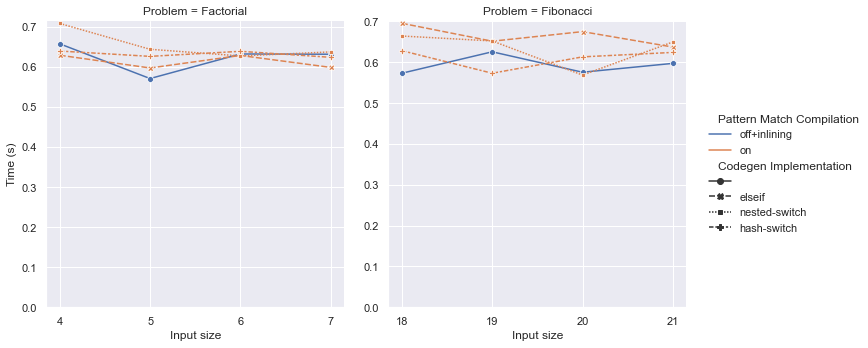

In [20]:
# Runtimes for DFA switch backends (per problem)

cols = ["Factorial", "Fibonacci"]
opt_levels=list(map(optlevel_to_label, ["3", "4"]))

g = configure_grid(sns.relplot(
    data=df_scaledproblem[(df_scaledproblem["Stage"] == "compileStratego") & (df_scaledproblem["Pattern Match Compilation"].isin(opt_levels))],
    x="Problem Size",
    y="Score",
    col="Problem",
    col_order=cols,
    col_wrap=min(3, len(cols)),
    style="Codegen Implementation",
    hue="Pattern Match Compilation",
    hue_order=opt_levels,
    kind="line",
#     err_style="band",
    markers=True,
    facet_kws=dict(
        sharex=False, 
        sharey=False,
    ),
))

g.set(ylim=(0, None))

# TODO Include strj runtime -> with and without fusion

# Save figure to file
g.savefig(f"{PLOT_DIR}/{'_'.join(results_files)}-fact&fib-compileStratego.png")
# g.savefig(f"{THESIS_FIGURE_DIR}/rec-fact&fib-compileStratego.pdf")

In [21]:
df_scaledproblem[(df_scaledproblem["Stage"] == "run") & (df_scaledproblem["Problem"] == "Sieve") & (df_scaledproblem["Problem Size"] == 100)]

,Benchmark,Mode,Threads,Samples,Score,Score Error (99.9%),Unit,Pattern Match Compilation,Problem Size,Shared Constructors,Codegen Implementation,Stage,Problem,Number of constructors
991,benchmark.stratego2.execution.Sieve.run,ss,1,5,5.221288,1.277721,s/op,off,100,on,,run,Sieve,NaN
996,benchmark.stratego2.execution.Sieve.run,ss,1,5,5.023102,1.502556,s/op,off+inlining,100,on,,run,Sieve,NaN
1009,benchmark.stratego2.execution.Sieve.run,ss,1,5,3.512647,1.421957,s/op,on,100,on,elseif,run,Sieve,NaN
1010,benchmark.stratego2.execution.Sieve.run,ss,1,5,0.915812,0.300643,s/op,on,100,on,nested-switch,run,Sieve,NaN
1011,benchmark.stratego2.execution.Sieve.run,ss,1,5,0.730851,0.147496,s/op,on,100,on,hash-switch,run,Sieve,NaN


In [22]:
df_ratios = df[df["Stage"] == "run"].pivot(index=["Codegen Implementation"], columns=["Benchmark", "Problem Size", "Pattern Match Compilation", "Problem"], values="Score").T

# df_ratios["Ratio"] = df_ratios["elseif"] / df_ratios["switch"]
df_ratios["Ratio [nested]"] = df_ratios["nested-switch"] / df_ratios["elseif"]
df_ratios["Ratio [hash]"] = df_ratios["hash-switch"] / df_ratios["elseif"]

df_ratios.sort_values("Ratio [hash]")

# df_ratios.columns.to_series().apply(''.join)

# df[df[""]]

Codegen Implementation                                                                                  \
Benchmark                                   Problem Size Pattern Match Compilation Problem               
benchmark.stratego2.execution.Benchexpr.run 18           on                        Benchexpr       NaN   
                                            17           on                        Benchexpr       NaN   
                                            16           on                        Benchexpr       NaN   
                                            15           on                        Benchexpr       NaN   
benchmark.stratego2.execution.Benchtree.run 7            on                        Benchtree       NaN   
...                                                                                                ...   
benchmark.stratego2.execution.Sieve.run     20           off+inlining              Sieve      0.555199   
                                            40           off+inlining              Sieve      0.962481   
                                            60           off+inlining              Sieve      1.854593   
                                            80           off+inlining              Sieve      3.353874   
                                            100          off+inlining              Sieve      5.023102   

Codegen Implementation                                                                            elseif  \
Benchmark                                   Problem Size Pattern Match Compilation Problem                 
benchmark.stratego2.execution.Benchexpr.run 18           on                        Benchexpr  448.010783   
                                            17           on                        Benchexpr  217.972991   
                                            16           on                        Benchexpr  107.376078   
                                            15           on                        Benchexpr   52.781842   
benchmark.stratego2.execution.Benchtree.run 7            on                        Benchtree  521.293040   
...                                                                                                  ...   
benchmark.stratego2.execution.Sieve.run     20           off+inlining              Sieve             NaN   
                                            40           off+inlining              Sieve             NaN   
                                            60           off+inlining              Sieve             NaN   
                                            80           off+inlining              Sieve             NaN   
                                            100          off+inlining              Sieve             NaN   

Codegen Implementation                                                                        hash-switch  \
Benchmark                                   Problem Size Pattern Match Compilation Problem                  
benchmark.stratego2.execution.Benchexpr.run 18           on                        Benchexpr    53.286188   
                                            17           on                        Benchexpr    27.110852   
                                            16           on                        Benchexpr    13.819482   
                                            15           on                        Benchexpr     7.315888   
benchmark.stratego2.execution.Benchtree.run 7            on                        Benchtree    74.717280   
...                                                                                                   ...   
benchmark.stratego2.execution.Sieve.run     20           off+inlining              Sieve              NaN   
                                            40           off+inlining              Sieve              NaN   
                                            60           off+inlining              Sieve              NaN   
                 

In [23]:
df_ratios_flat = df_ratios.melt(value_vars=["Ratio [hash]"], value_name="Ratio", ignore_index=False)
# df_ratios_flat.index = df_ratios_flat.index.to_flat_index()
# df_ratios_flat.reset_index()
df_ratios_flat.index
df_ratios_flat

Codegen Implementation  \
Benchmark                                      Problem Size Pattern Match Compilation Problem                               
benchmark.stratego2.execution.BenchNullary.run 100          off                       BenchNullary           Ratio [hash]   
                                               200          off                       BenchNullary           Ratio [hash]   
                                               300          off                       BenchNullary           Ratio [hash]   
                                               400          off                       BenchNullary           Ratio [hash]   
                                               500          off                       BenchNullary           Ratio [hash]   
...                                                                                                                   ...   
benchmark.stratego2.execution.Sieve.run        20           on                        Sieve                  Ratio [hash]   
                                               40           on                        Sieve                  Ratio [hash]   
                                               60           on                        Sieve                  Ratio [hash]   
                                               80           on                        Sieve                  Ratio [hash]   
                                               100          on                        Sieve                  Ratio [hash]   

                                                                                                       Ratio  
Benchmark                                      Problem Size Pattern Match Compilation Problem                 
benchmark.stratego2.execution.BenchNullary.run 100          off                       BenchNullary       NaN  
                                               200          off                       BenchNullary       NaN  
                                               300          off                       BenchNullary       NaN  
                                               400          off                       BenchNullary       NaN  
                                               500          off                       BenchNullary       NaN  
...                                                                                                      ...  
benchmark.stratego2.execution.Sieve.run        20           on                        Sieve         0.816219  
                                               40           on                        Sieve         0.647936  
                                               60           on                        Sieve         0.483853  
                                               80           on                        Sieve         0.272673  
                                               100          on                        Sieve         0.208063  

[195 rows x 2 columns]

In [24]:
# df_ratios.melt(id_

In [26]:
# # Runtimes for DFA switch backends (against number of constructors)

# g = configure_grid(sns.boxplot(
#     data=df_ratios,
#     x="Problem",
#     y="Ratio [hash]",
#     # style="Problem",
#     # hue="Problem",
#     # size="Problem Size",
#     # kind="scatter",
    
#     # style="Codegen Implementation",
#     # hue="Pattern Match Compilation",
#     # hue_order=map(optlevel_to_label, ["2", "3", "4"]),
#     markers=True,
#     facet_kws=dict(
#         sharex=False, 
#         sharey=False,
#     ),
# ))

# # g.set(yscale="log")
# g.set_ylabels("Ratio of runtime [hash-switch] over runtime [elseif]")
# g.set_xlabels("# of constructors in program")

# # TODO Include strj runtime -> with and without fusion

# # Save figure to file
# g.tight_layout()
# plt.savefig(f"{PLOT_DIR}/{'_'.join(results_files)}-backend-constructors.png")

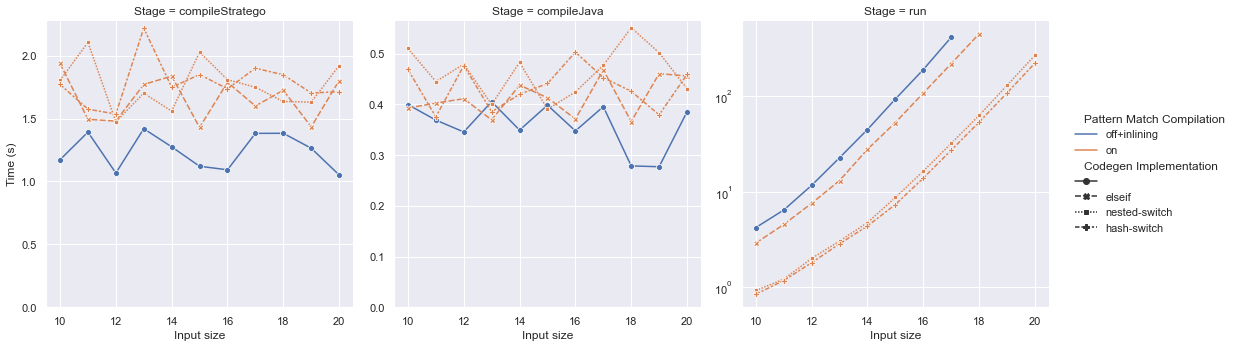

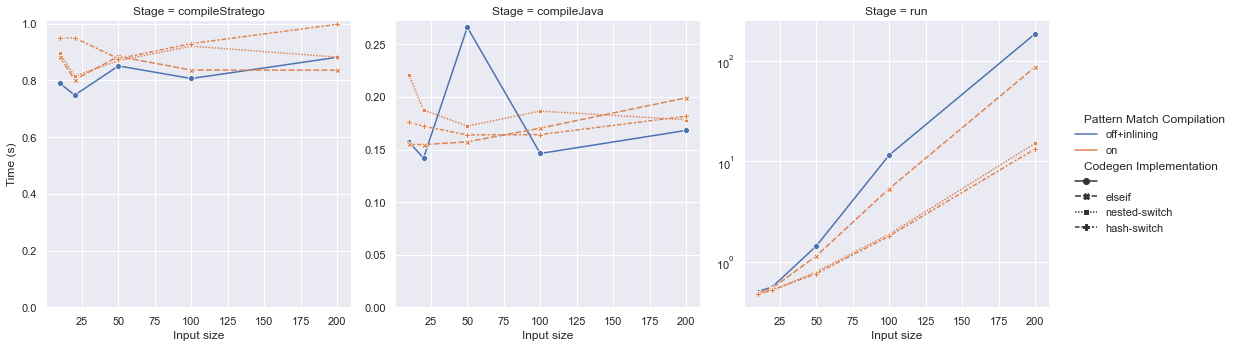

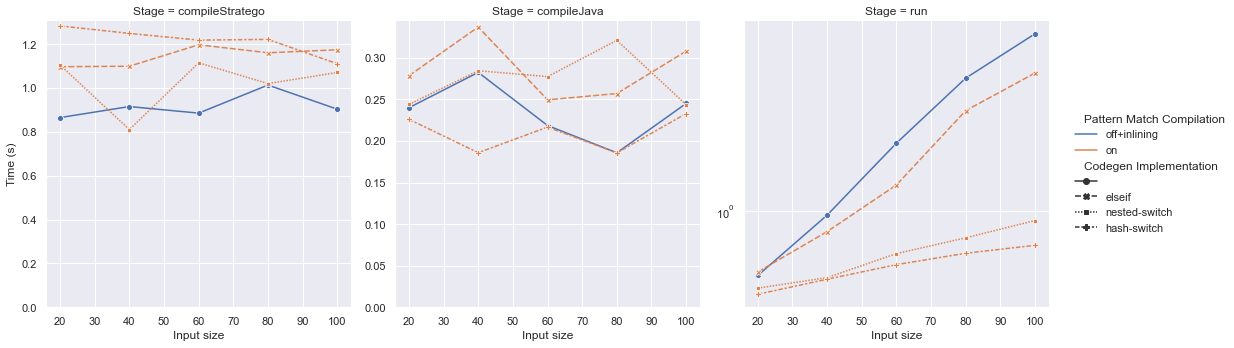

In [27]:
for problem in ["Benchexpr", "Bubblesort", "Sieve"]:
    df_problem = df_scaledproblem[df_scaledproblem["Problem"] == problem]
    
    cols = [s for s in ["compileStratego", "compileJava", "run", "Java space", "Class space"] if s in df_problem["Stage"].values]

    g = configure_grid(sns.relplot(
        data=df_problem,
        x="Problem Size",
        y="Score",
#         row="Problem",
#         row_order=np.sort(np.unique(df_problem["Problem"].values)),
        col_wrap=min(3, len(cols)),
        col="Stage",
        col_order=cols,
        style="Codegen Implementation",
        hue="Pattern Match Compilation",
        hue_order=[l for l in map(optlevel_to_label, ["3", "4"]) if l in df_problem["Pattern Match Compilation"].values],
        kind="line",
    #     err_style="band",
        markers=True,
        facet_kws=dict(
            sharex=False, 
            sharey=False,
        ),
    ), problem)

    # Save figure to file
    g.savefig(f"{PLOT_DIR}/{'_'.join(results_files)}-{problem}.png")
    # g.savefig(f"{THESIS_FIGURE_DIR}/rec-{problem}-stages.pdf")

In [28]:
df_unscaledproblem = df[df["Problem Size"] == -1]

print(df_unscaledproblem.to_latex(
    columns=["Problem", "Stage", "Samples", "Score", "Score Error (99.9%)", "Pattern Match Compilation", "Codegen Implementation"]
))

df_unscaledproblem

\begin{tabular}{lllrrrll}
\toprule
{} &                Problem &            Stage &  Samples &     Score &  Score Error (99.9\%) & Pattern Match Compilation & Codegen Implementation \\
\midrule
0   &             CallMutual &   compileChocoPy &        5 &  0.016438 &             0.004302 &                       off &                        \\
1   &             CallMutual &   compileChocoPy &        5 &  0.018066 &             0.007571 &              off+inlining &                        \\
2   &             CallMutual &   compileChocoPy &        5 &  0.016013 &             0.003454 &                        on &            hash-switch \\
3   &                    Exp &   compileChocoPy &        5 &  0.018574 &             0.007117 &                       off &                        \\
4   &                    Exp &   compileChocoPy &        5 &  0.014196 &             0.009793 &              off+inlining &                        \\
5   &                    Exp &   compileChocoPy &       

,Benchmark,Mode,Threads,Samples,Score,Score Error (99.9%),Unit,Pattern Match Compilation,Problem Size,Shared Constructors,Codegen Implementation,Stage,Problem,Number of constructors
0,benchmark.chocopy.compilation.CallMutual.compi...,ss,1,5,0.016438,0.004302,s/op,off,-1,on,,compileChocoPy,CallMutual,NaN
1,benchmark.chocopy.compilation.CallMutual.compi...,ss,1,5,0.018066,0.007571,s/op,off+inlining,-1,on,,compileChocoPy,CallMutual,NaN
2,benchmark.chocopy.compilation.CallMutual.compi...,ss,1,5,0.016013,0.003454,s/op,on,-1,on,hash-switch,compileChocoPy,CallMutual,NaN
3,benchmark.chocopy.compilation.Exp.compileChocoPy,ss,1,5,0.018574,0.007117,s/op,off,-1,on,,compileChocoPy,Exp,NaN
4,benchmark.chocopy.compilation.Exp.compileChocoPy,ss,1,5,0.014196,0.009793,s/op,off+inlining,-1,on,,compileChocoPy,Exp,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,benchmark.stratego2.execution.GarbageCollectio...,ss,1,5,0.449279,0.185248,s/op,off,-1,on,,run,GarbageCollection,NaN
893,benchmark.stratego2.execution.GarbageCollectio...,ss,1,5,0.491743,0.014529,s/op,off+inlining,-1,on,,run,GarbageCollection,NaN
894,benchmark.stratego2.execution.GarbageCollectio...,ss,1,5,0.460978,0.018114,s/op,on,-1,on,elseif,run,GarbageCollection,NaN
895,benchmark.stratego2.execution.GarbageCollectio...,ss,1,5,0.461342,0.020138,s/op,on,-1,on,nested-switch,run,GarbageCollection,NaN


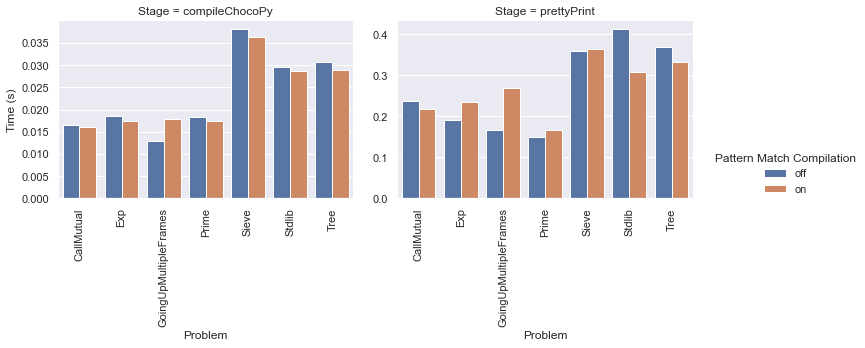

In [29]:
g = sns.catplot(
    data = df_unscaledproblem.loc[df_unscaledproblem["Benchmark"].str.contains("chocopy") & ((df_unscaledproblem["Pattern Match Compilation"] == optlevel_to_label("2")) | (df_unscaledproblem["Codegen Implementation"] == "hash-switch"))],
    x = "Problem",
    y = "Score",
    col = "Stage",
    hue = "Pattern Match Compilation",
    kind = "bar",
    sharey=False,
)

g.set_ylabels("Time (s)")
for _, ax in g.axes_dict.items():
    locs = ax.get_xticks()
    labels = ax.get_xticklabels()
    ax.set_xticks(locs, labels, rotation=90)
# plt.xticks(rotation=90)

# g.map(plt.errorbar, "Problem", "Score", "Score Error (99.9%)", marker="o")
# g.map(plt.xticks, "Problem", "Score", rotation=90)

g.savefig(f"{PLOT_DIR}/{'_'.join(results_files)}-unscaled.png")
# g.savefig(f"{THESIS_FIGURE_DIR}/chocopy-alltimes.pdf")

# Experiments

In [100]:
def errorbar_pmc(x, y, err, pmc, **kwargs):
    for i in set(pmc):
        print(pmc == i)
        plt.errorbar(x[pmc == i], y[pmc == i], err[pmc == i])
        
def errorbar(x, y, err, *args, **kwargs):
    import itertools
    from functools import reduce
    
    print("kwargs: " + str(kwargs))
    for p in itertools.product(*map(lambda arg: set(arg), args)):
        print("p", p)
        
        ind = reduce(lambda acc, tp: acc & (args[tp[0]] == tp[1]), enumerate(p), [True] * len(x))
        
        plt.errorbar(x[ind], y[ind], err[ind], ecolor=None, capsize=5, **kwargs) # kwargs["color"]
        
        # for i, x in enumerate(p):
        #     print("i: " + str(i))
        #     print("x: " + str(x))
        #     print(args[i] == x)
        # print(x[pmc == i], y[pmc == i])
        # plt.errorbar(x[pmc == i], y[pmc == i], err[pmc == i], **kwargs)

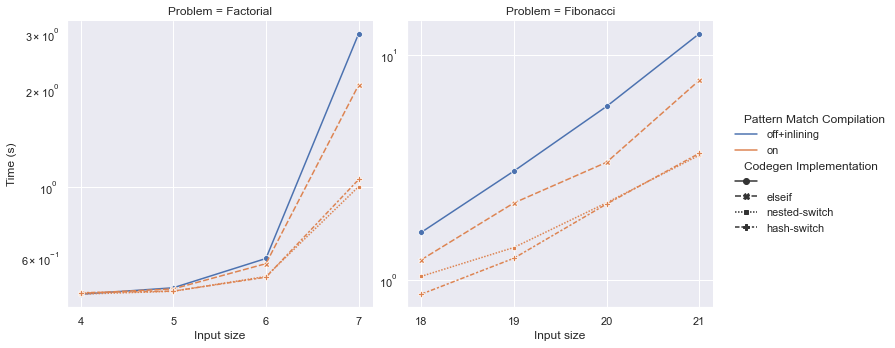

In [163]:
cols = ["Factorial", "Fibonacci"]
opt_levels=list(map(optlevel_to_label, ["3", "4"]))

g = configure_grid(sns.relplot(
    data=df_scaledproblem[(df_scaledproblem["Stage"] == "run") & (df_scaledproblem["Pattern Match Compilation"].isin(opt_levels))],
    x="Problem Size",
    y="Score",
    col="Problem",
    col_order=cols,
    # col_wrap=min(3, len(cols)),
    # row="Pattern Match Compilation",
    style="Codegen Implementation",
    hue="Pattern Match Compilation",
    hue_order=opt_levels,
    kind="line",
#     err_style="band",
    markers=True,
    facet_kws=dict(
        sharex=False, 
        sharey=False,
    ),
))

g.set(yscale="log")

# g.map(errorbar, "Problem Size", "Score", "Score Error (99.9%)", "Pattern Match Compilation", "Codegen Implementation", "Problem")

In [ ]:
df_scaledproblem[(df_scaledproblem["Problem"] == "Fibonacci") & (df_scaledproblem["Pattern Match Compilation"] == "off+inlining") & (df_scaledproblem["Stage"] == "run")]

In [31]:
plt.errorbar

<function matplotlib.pyplot.errorbar(x, y, yerr=None, xerr=None, fmt='', ecolor=None, elinewidth=None, capsize=None, barsabove=False, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None, *, data=None, **kwargs)>